<a href="https://colab.research.google.com/github/Ahmed-Sohail2000/Leaf-Disease-Classification-Project/blob/main/Leaf_Disease_Classification_Project_%F0%9F%8D%80%F0%9F%92%BB%F0%9F%A4%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leaf Disease Classification Project 🍀👨‍💻

### Project Scope & Objectives 🎯

The aim of the project is to build an accurate deep learning model to identify and classify whether or not a plant leaf has a disease or not based on a dataset images of 87,000 which are categorized into 38 different classes and split into 80% for training and 20% for testing.

### Project Goal 🥅

The objective is to develop a model that can:

1. Identify the correct class (out of 38) to which the leaf belongs.

2. Classify the leaf's health condition as one of the following:

* Healthy
* Initial stage of disease
* Middle stage of disease
* Severe damage

3. Analyze the percentage of leaf area affected for severity detection.

4. Provide key performance metrics such as:

* Accuracy
* Precision
* Recall
* F1 Score

5. Handle overfitting and underfitting issues explicitly and show how they impact model performance.

### Project Dataset 🔢📷

The dataset as mentioned above consists of 87,000 images of plant leafs categorized into 38 different classes and is split into training (80%) and testing (20%) respectively to train and evaluate the performance of the model.

### Project Tools 🛠️

The tools that will be used in this project are `TensorFlow` and `Keras API`. Along with that the models that will be implemented and evaluated are:

Models to Implement:

1. SVM with HOG (Histogram of Oriented Gradients) for feature extraction

2. SVM with VGG16 (Pre-trained Model) for feature extraction

3. CNN with multiple convolutional layers to directly extract features

Each of the models will be used to extract the features, train, and then evaluate the model accuracy to determine which one is the preferred model based on our dataset and problem classification.

### 📌 Project Workflow / Pipeline 🚀


1.0 Data Collection & Preprocessing 📥

🔹Load dataset (Kaggle).

🔹Split into Train (80%) & Validation (20%). (unless already done)

🔹Resize, normalize, and augment images if needed.

2.0 Exploratory Data Analysis (EDA) 📊

🔹Visualize class distribution.

🔹Display sample images per class.

3.0 Data Preprocessing ⚙️

🔹Image resizing

🔹Augmentation

🔹Normalization

4.0 Model Implementation ➕🤖

🔹SVM + HOG → Extract HOG features & train SVM.

🔹SVM + VGG16 → Use VGG16 for feature extraction & train SVM.

🔹CNN Model → Train a deep CNN directly on images.

5.0 Model Evaluation 📈

🔹Compare Accuracy, Precision, Recall, and F1-Score.

🔹Analyze confusion matrix & training curves.

5.0 Severity Detection (Leaf Area Affected) 🌿

🔹Segment affected regions.

🔹Calculate % of damaged leaf area.

🔹Classify into Healthy, Initial, Middle, Severe.

6.0 Final Deliverables 📤

✅ Jupyter Notebook with complete code.

✅ Saved models (.h5 / .pkl).

✅ Performance reports & graphs.


### Project Resources 📚

### 1.0 Getting the dataset (Using Kaggle API)

**Instructions for acquiring the dataset**

1. Go to [Kaggle Account Settings](https://www.kaggle.com/account).
2. Click **"Create New API Token"** (it will download `kaggle.json`).
3. Upload `kaggle.json` in the notebook and run the following.

* https://www.freecodecamp.org/news/how-to-download-kaggle-dataset-to-google-colab/

In [1]:
# install kaggle api
!pip install --upgrade kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [2]:
# upload the kaggle api json file
from google.colab import files

files.upload()  # Upload kaggle.json when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedsohail2000","key":"46f9cf7a5673e5b3e3c39696dbeb4203"}'}

In [3]:
# move the json file to the directory
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
import os
import shutil

# Setup the dataset folder path
dataset_folder = "/content/New Plant Diseases Dataset(Augmented)"

if not os.path.exists(dataset_folder):  # if the dataset folder path directory is not found

  !kaggle datasets download -d vipoooool/new-plant-diseases-dataset -q    # downloads the dataset from kaggle
  !unzip -q new-plant-diseases-dataset.zip -d /content/   # unzip the contents of the new plant diseases dataset
  !rm new-plant-diseases-dataset.zip  # Remove ZIP file after extraction

  # Remove duplicate dataset folder if it exists
  duplicate_folder = "/content/new plant diseases dataset(augmented)"

  if os.path.exists(duplicate_folder):  # if the duplicated folder path exists then remove it
    shutil.rmtree(duplicate_folder)

  print("Dataset downloaded and extracted.")

else:
  print("Dataset already exists. Skipping download.")


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
Dataset downloaded and extracted.


Awesome, now that we have gotten our image dataset loaded into goolge colab, let's visualize our images and see what we are working with.

### 2.0 Exploratory Data Analysis (Visualize, Visualize, Visualize)

before visualizing the leaf images, lets first see how our folder structure is and where the train and valid datasets are.

In [5]:
# check the dataset folder structure
import os

dataset_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

# List the main folders (Train, Test, Validation)
os.listdir(dataset_path)

['valid', 'train']

lets define the base path of the dataset and join it with the train, valid, and test dataset which will check if it exists.

In [6]:
import os

# Define the paths
base_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_path = os.path.join(base_path, "train")
valid_path = os.path.join(base_path, "valid")
test_path = "/content/test/test"  # Test images are directly inside /test/test

# Check if paths exist
print("Train Folder Exists:", os.path.exists(train_path))
print("Valid Folder Exists:", os.path.exists(valid_path))
print("Test Folder Exists:", os.path.exists(test_path))


Train Folder Exists: True
Valid Folder Exists: True
Test Folder Exists: True


In [11]:
# lets view the first 10 files for train and valid
import os

# train and valid path
train_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

# print the first 10 files
print("First 10 files in the train directory:\n")
print(os.listdir(train_dir)[:10])

print("\nFirst 10 files in the valid directory:\n")
print(os.listdir(valid_dir)[:10])

First 10 files in the train directory:

['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Corn_(maize)___healthy', 'Peach___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Late_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Soybean___healthy', 'Peach___Bacterial_spot', 'Corn_(maize)___Common_rust_']

First 10 files in the valid directory:

['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Corn_(maize)___healthy', 'Peach___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Late_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Soybean___healthy', 'Peach___Bacterial_spot', 'Corn_(maize)___Common_rust_']


now we will create a function which will count the number of images in a dataset per class for train, valid, test

In [12]:
import os

# Define dataset paths
train_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_dir = "/content/test/test"

# Function to count images in each class
def count_images_per_class(directory):
  '''
  creates a function to count the number of images per class

  E.g. train counts: 'Grape Leaf Blight': 1722, 'Apple Black Rot': 1987, etc
  '''
  class_counts = {}     # create an empty dictionary to store the train class keys into this dictionary

  for class_name in os.listdir(directory):            # go through each file in that list directory
    class_path = os.path.join(directory, class_name)  # join the directory path with that file to have a class path. eg. /content/new....dataset(augmented)/train/appleblackrot.jpg

    if os.path.isdir(class_path):                     # if the class path exists or not
      class_counts[class_name] = len(os.listdir(class_path))    # then assign the class count dictionary with that class name and getting the total length of that class

  return class_counts

# Count images per class
train_counts = count_images_per_class(train_dir)
valid_counts = count_images_per_class(valid_dir)
test_count = len(os.listdir(test_dir))  # Test folder contains only images

print("Train set class distribution: \n", train_counts)
print("Validation set class distribution: \n", valid_counts)

# get the total images for train, valid, test
total_train_images = sum(train_counts.values())  # this gets the sum of the train values for each class
total_valid_images = sum(valid_counts.values())  # same for valid
total_test_images = test_count     # same for test

print("Total Train Images:", total_train_images)
print("Total Valid Images:", total_valid_images)
print("Total Test Images:", total_test_images)

Train set class distribution: 
 {'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1722, 'Corn_(maize)___healthy': 1859, 'Peach___healthy': 1728, 'Apple___Cedar_apple_rust': 1760, 'Tomato___Late_blight': 1851, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 1961, 'Tomato___Tomato_mosaic_virus': 1790, 'Soybean___healthy': 2022, 'Peach___Bacterial_spot': 1838, 'Corn_(maize)___Common_rust_': 1907, 'Raspberry___healthy': 1781, 'Cherry_(including_sour)___healthy': 1826, 'Tomato___Spider_mites Two-spotted_spider_mite': 1741, 'Cherry_(including_sour)___Powdery_mildew': 1683, 'Apple___Black_rot': 1987, 'Apple___Apple_scab': 2016, 'Tomato___Bacterial_spot': 1702, 'Pepper,_bell___healthy': 1988, 'Strawberry___healthy': 1824, 'Grape___Esca_(Black_Measles)': 1920, 'Tomato___Early_blight': 1920, 'Orange___Haunglongbing_(Citrus_greening)': 2010, 'Grape___Black_rot': 1888, 'Potato___healthy': 1824, 'Corn_(maize)___Northern_Leaf_Blight': 1908, 'Potato___Late_blight': 1939, 'Blueberry___healthy': 1816, 'Pepper,_

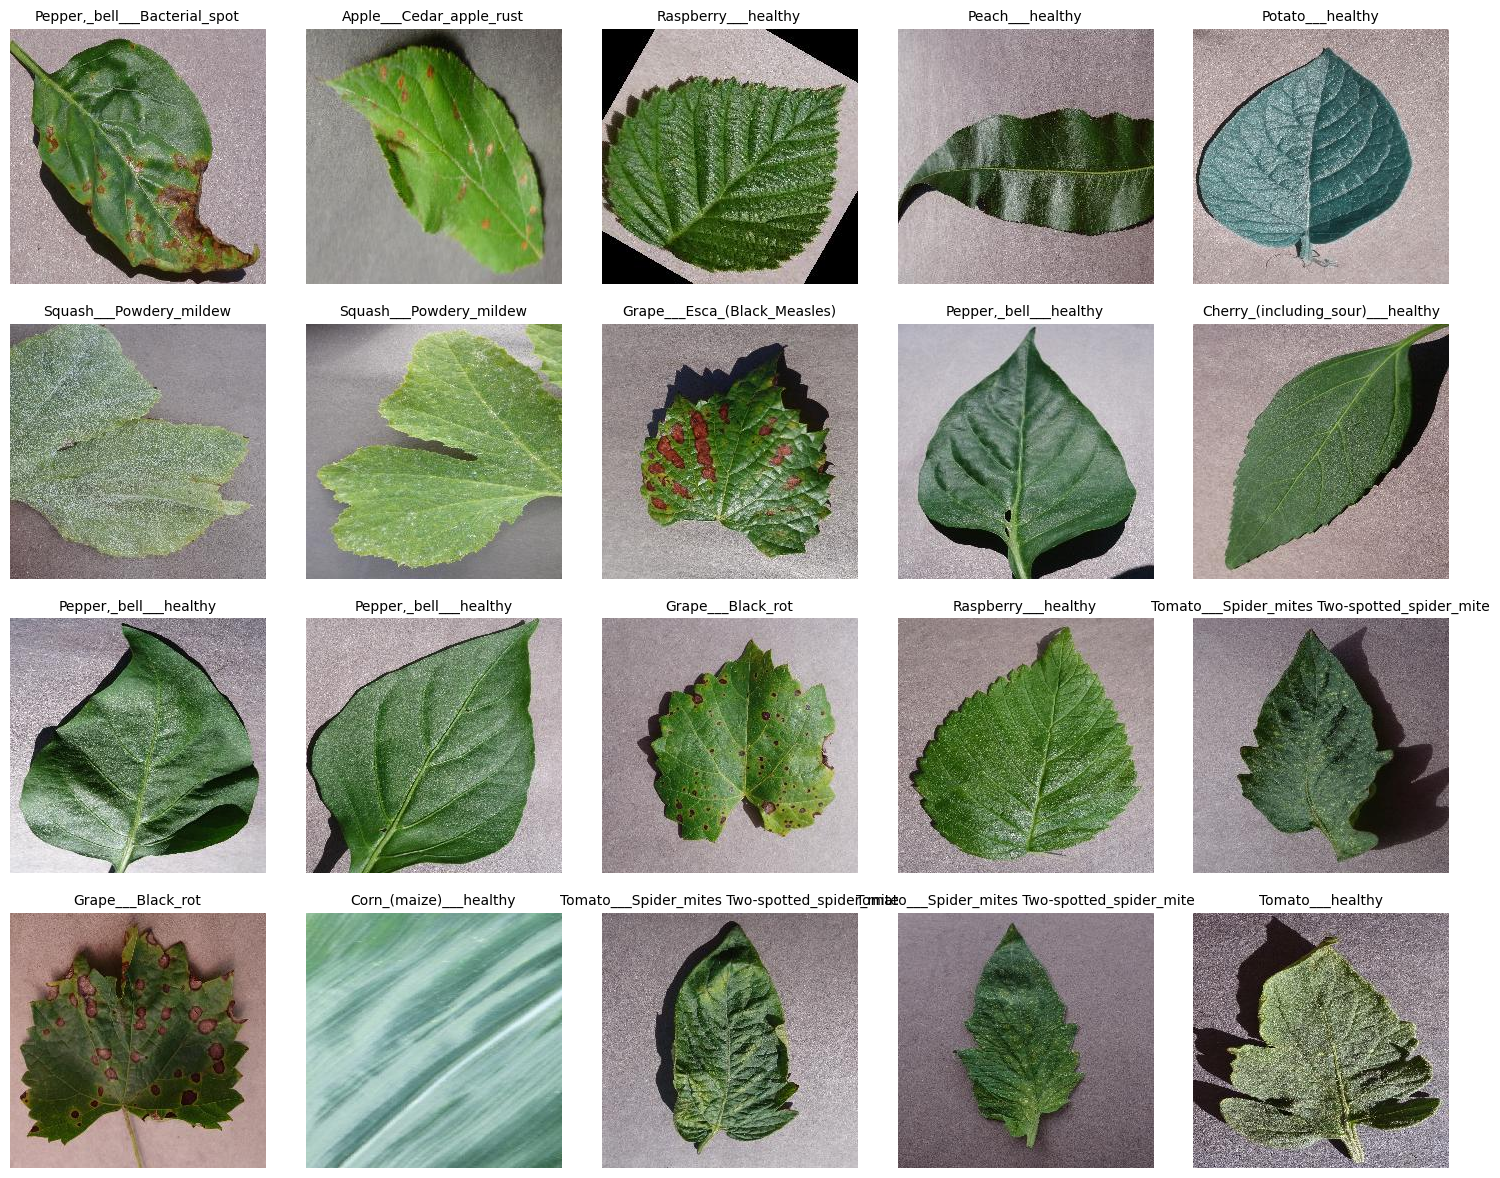

In [18]:
import matplotlib.pyplot as plt  # Import Matplotlib for visualization
import os  # OS module for handling file paths
import random  # Random module to pick images randomly
from PIL import Image  # PIL (Pillow) for image processing

def show_sample_images(directory, num_images=20):
  """
  Function to display sample images from the dataset.

  Parameters:
  directory (str): Path to the dataset directory.
  num_images (int): Number of images to display (default is 20).
  """

  image_paths = []  # List to store image file paths

  # Loop through each class folder inside the dataset directory
  for class_folder in os.listdir(directory):
    class_path = os.path.join(directory, class_folder)  # Get full path of class folder

    if os.path.isdir(class_path):  # Ensure it's a directory

      for image_name in os.listdir(class_path):  # Loop through images in the class folder
        image_paths.append(os.path.join(class_path, image_name))  # Store image path

  # Select a random set of images, ensuring we don't exceed available images
  sample_images = random.sample(image_paths, min(num_images, len(image_paths)))

  # Define grid layout
  cols = 5  # Number of columns
  rows = (num_images // cols) + (num_images % cols > 0)  # Adjust rows dynamically
  fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))  # Adjust spacing

  # Flatten axes for easy iteration
  axes = axes.flatten()

  for i, img_path in enumerate(sample_images):
    img = Image.open(img_path)  # Open image using PIL
    axes[i].imshow(img)  # Show image
    axes[i].axis("off")  # Hide axis for better visualization
    class_name = os.path.basename(os.path.dirname(img_path))  # Extract class name
    axes[i].set_title(class_name, fontsize=10)  # Set smaller font size for clarity

  # Hide unused subplots
  for j in range(i + 1, len(axes)):
    axes[j].axis("off")

  plt.tight_layout(pad=1.5)  # Adjust layout to prevent overlap
  plt.show()  # Show the final plot

# Call the function with your dataset directory (train_dir should be defined)
show_sample_images(train_dir)

Awesome, now lets create a function that will show the image size for each directory.

In [20]:
from PIL import Image
import os

# Function to get unique image dimensions in a dataset directory
def get_shapes(directory):

  return {Image.open(os.path.join(root, file)).size for root, _, files in os.walk(directory) for file in files}

# Function to check image dimensions in train, valid, and test sets
def check_image_shapes(train_dir, valid_dir, test_dir):
  train_shapes = get_shapes(train_dir)  # Get unique shapes for train dataset
  valid_shapes = get_shapes(valid_dir)  # Get unique shapes for validation dataset
  test_shape = next((Image.open(os.path.join(test_dir, file)).size for file in os.listdir(test_dir)), None)  # Get first test image shape

  return train_shapes, valid_shapes, test_shape

# Run the function
train_shapes, valid_shapes, test_shape = check_image_shapes(train_dir, valid_dir, test_dir)

# Print results
print("Unique Train Image Shapes:", train_shapes)
print("Unique Valid Image Shapes:", valid_shapes)
print("First Test Image Shape:", test_shape)

Unique Train Image Shapes: {(256, 256)}
Unique Valid Image Shapes: {(256, 256)}
First Test Image Shape: (256, 256)


Perfect, now we know what type of images and size of our images are so that we can understand how to resize it later for data preprocessing and putting it into a proper structure.

### 3.0 Data Preprocessing 🛠️

In this section, we will be putting our dataset into a proper format to be used in deep learning models as mentioned in section 4.0 which is model implementation. So for data preprocessing, we will be doing the following:

1. Data cleaning: ensure no corrupt images.
2. Image resizing: Standardize the images to (224 X 224 X 3) which is 224 for Length, 224 for width, and 3 colors channels (RGB) for our images.
3. Data augmentation: Flipping, rotation, brightness change. This prevents our model from overfitting and makes our model more accurate to predict based on our diverse dataset.
4. Normalization: Scale the pixel values of our images between 0 and 1 for better traininig.
